# Statistical Power

**Null hypothesis:** both samples came from the same distribution
- with a small p-value (<0.05), we can reject it
    
**Power Analysis**: determines what sample size ensures a high probability of rejecting the Null Hypothesis correctly.

Factors affecting Power:
- How much overlap there is between the two (or more)  distributions
- The sample size of each group


In [1]:
import scipy.stats as stats
import numpy as np
from Helper import cohens_d 
from Helper import cohend 

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


rng = np.random.RandomState(2) 
population_size = 5000

population_1_distribution = rng.normal(
    loc=2.0,        # The mean of the distribution
    scale=2,      # The standard deviation 
    size=population_size      # The size or shape of your array
)

population_2_distribution = rng.normal(
    loc=10.0,        # The mean of the distribution
    scale=2,      # The standard deviation 
    size=population_size      # The size or shape of your array
)




<AxesSubplot:ylabel='Count'>

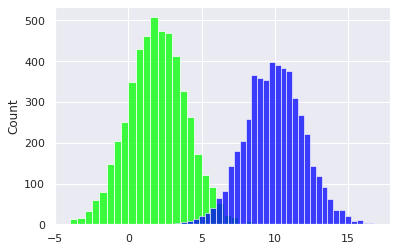

In [2]:
sns.histplot(population_1_distribution, kde=False, color="lime",bins=np.arange(-4.0,17.0,0.5))
sns.histplot(population_2_distribution, kde=False, color="blue",bins=np.arange(-4.0,17.0,0.4))


In [3]:
sample_distribution_1 = np.random.choice(population_1_distribution, 10, replace=False)
sample_distribution_2 = np.random.choice(population_2_distribution, 10, replace=False)
s, p = stats.ttest_ind(sample_distribution_1, sample_distribution_2)
print(f'The first p-value is = {p}, so we can say (and see) that the two samples came from different populations')

The first p-value is = 2.3594646422780005e-08, so we can say (and see) that the two samples came from different populations


### Effect Size 

Cohens_d is a good way to see if the effect size is good. 

Here we are going to fake a little bit and use the population data to define the estimated mean and estimated std (they are the real mean and std)

In [4]:
es1=cohens_d(population_1_distribution,population_2_distribution)
print(es1)
es2=cohend(population_1_distribution,population_2_distribution)
print(es2)

-4.007094305842064
-4.006693576374005


In [5]:
import statsmodels.stats.power as smp
power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=es1, power=0.8, alpha=0.05)
print(f'The statistical power of the fist case is {sample_size}')
sample_size = power_analysis.solve_power(effect_size=es2, power=0.8, alpha=0.05)
print(f'The statistical power of the second case is {sample_size}')

The statistical power of the fist case is 2.410976941371234
The statistical power of the second case is 2.4111412784377926


This second example is a bit tricky:

<AxesSubplot:ylabel='Count'>

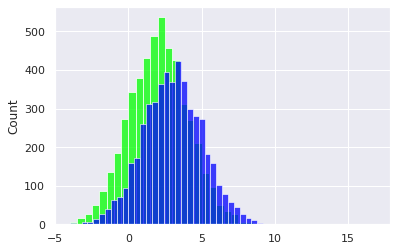

In [6]:
population_1_distribution = rng.normal(
    loc=2.0,        # The mean of the distribution
    scale=2,      # The standard deviation 
    size=population_size      # The size or shape of your array
)

population_2_distribution = rng.normal(
    loc=3.0,        # The mean of the distribution
    scale=2,      # The standard deviation 
    size=population_size      # The size or shape of your array
)
sns.histplot(population_1_distribution, kde=False, color="lime",bins=np.arange(-4.0,17.0,0.5))
sns.histplot(population_2_distribution, kde=False, color="blue",bins=np.arange(-4.0,17.0,0.4))


In [7]:
sample_distribution_1 = np.random.choice(population_1_distribution, 10, replace=False)
sample_distribution_2 = np.random.choice(population_2_distribution, 10, replace=False)
s, p = stats.ttest_ind(sample_distribution_1, sample_distribution_2)
print(f'The first p-value is = {p}, so we cannot reject the null hypothesis; If you keep running the example, at some point you may get a case were we will reject the null hypothesis')

The first p-value is = 0.8519959218553943, so we cannot reject the null hypothesis; If you keep running the example, at some point you may get a case were we will reject the null hypothesis


In [8]:
es1=cohens_d(population_1_distribution,population_2_distribution)
print(es1)
es2=cohend(population_1_distribution,population_2_distribution)
print(es2)
sample_size = power_analysis.solve_power(effect_size=es1, power=0.8, alpha=0.05)
print(f'The statistical power of the fist case is {sample_size}')
sample_size = power_analysis.solve_power(effect_size=es2, power=0.8, alpha=0.05)
print(f'The statistical power of the second case is {sample_size}')

-0.48120300439428354
-0.4811548816875885
The statistical power of the fist case is 68.76590570860506
The statistical power of the second case is 68.77946421615302


In [9]:
sample_distribution_1 = np.random.choice(population_1_distribution, 70, replace=False)
sample_distribution_2 = np.random.choice(population_2_distribution, 70, replace=False)
s, p = stats.ttest_ind(sample_distribution_1, sample_distribution_2)
print(f'But, if we increase the sample size, we have a good way to see that are two populations.The p-value is = {p}')

But, if we increase the sample size, we have a good way to see that are two populations.The p-value is = 0.04639955843278564


In [10]:
es1=cohens_d(population_1_distribution,population_2_distribution)
print(es1)
es2=cohend(population_1_distribution,population_2_distribution)
print(es2)
sample_size = power_analysis.solve_power(effect_size=es1, power=0.8, alpha=0.05)
print(f'The statistical power of the fist case is {sample_size}')
sample_size = power_analysis.solve_power(effect_size=es2, power=0.8, alpha=0.05)
print(f'The statistical power of the second case is {sample_size}')

-0.48120300439428354
-0.4811548816875885
The statistical power of the fist case is 68.76590570860506
The statistical power of the second case is 68.77946421615302
